<a href="https://colab.research.google.com/github/giridharans22it/ML/blob/main/exp3to6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

e3

In [ ]:
from math import sqrt
from collections import Counter
import pandas as pd

# Dataset in the order given in the image
data = [[5.3, 3.7, 'Setosa'],[5.1, 3.8, 'Setosa'],[7.2, 3.0, 'Virginica'],[5.4, 3.4, 'Setosa'],[5.1, 3.3, 'Setosa'],[5.4, 3.9, 'Setosa'],[7.4, 2.8, 'Virginica'],[6.1, 2.8, 'Versicolor'],[7.3, 2.9, 'Virginica'],[6.0, 2.7, 'Versicolor'],[5.8, 2.8, 'Virginica'],[6.3, 2.3, 'Versicolor'],[5.1, 2.5, 'Versicolor'],[6.3, 2.5, 'Versicolor'],[5.4, 2.4, 'Versicolor']]

# New instance to classify
new_instance = [5.2, 3.1]

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return sqrt(sum((p1 - p2) ** 2 for p1, p2 ..in zip(point1, point2)))

# Calculate distances and add them to the data
for instance in data:
    distance = euclidean_distance(new_instance, instance[:2])
    instance.append(distance)

# Create a DataFrame for better visualization
df = pd.DataFrame(data, columns=['Sepal Length', 'Sepal Width', 'Species', 'Distance'])

# Add a Rank column based on the distance (ascending order)
df['Rank'] = df['Distance'].rank(method='min').astype(int)

# Display the table in the order given in the question
print("Table with Distance and Rank:")
print(df)

# Function to get k-nearest neighbors
def get_neighbors(df, k):
    df_sorted = df.sort_values('Distance').head(k)
    return df_sorted

# Function to predict the class
def predict_classification(neighbors):
    classes = neighbors['Species'].values
    majority_vote = Counter(classes).most_common(1)[0][0]
    return majority_vote

# Apply k-NN for k = 1, 2, 3 and predict the class
for k in [1, 2, 3]:
    neighbors = get_neighbors(df, k)
    predicted_class = predict_classification(neighbors)
    print(f"\nPredicted class for k={k}: {predicted_class}")

Table with Distance and Rank:
    Sepal Length  Sepal Width     Species  Distance  Rank
0            5.3          3.7      Setosa  0.608276     3
1            5.1          3.8      Setosa  0.707107     6
2            7.2          3.0   Virginica  2.002498    13
3            5.4          3.4      Setosa  0.360555     2
4            5.1          3.3      Setosa  0.223607     1
5            5.4          3.9      Setosa  0.824621     8
6            7.4          2.8   Virginica  2.220360    15
7            6.1          2.8  Versicolor  0.948683    10
8            7.3          2.9   Virginica  2.109502    14
9            6.0          2.7  Versicolor  0.894427     9
10           5.8          2.8   Virginica  0.670820     5
11           6.3          2.3  Versicolor  1.360147    12
12           5.1          2.5  Versicolor  0.608276     4
13           6.3          2.5  Versicolor  1.252996    11
14           5.4          2.4  Versicolor  0.728011     7

Predicted class for k=1: Setosa

Predicte

In [ ]:
import pandas as pd
from collections import defaultdict

# Sample dataset
data = {
    'Weather Condition': ['Rainy', 'Rainy', 'OverCast', 'Sunny', 'Sunny', 'Sunny', 'OverCast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'OverCast', 'OverCast', 'Sunny'],
    'Wins in last 3 matches': ['3 wins', '3 wins', '3 wins', '2 wins', '1 win', '1 win', '1 win', '2 wins', '1 win', '2 wins', '2 wins', '2 wins', '3 wins', '2 wins'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Win toss': ['FALSE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE'],
    'Won match?': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display Training Data
print("Training Data:")
print(df)

# 1. Frequency Table
def calculate_frequency_table(df):
    freq_table = defaultdict(lambda: defaultdict(int))
    total_count = defaultdict(int)

    for _, row in df.iterrows():
        label = row['Won match?']
        total_count[label] += 1
        for column in df.columns[:-1]:
            freq_table[column][(row[column], label)] += 1

    return freq_table, total_count

freq_table, total_count = calculate_frequency_table(df)

# Display Frequency Table
print("\nFrequency Table:")
for feature, values in freq_table.items():
    print(f"\nFeature: {feature}")
    for (value, label), count in values.items():
        print(f"  Value: {value}, Label: {label} => Count: {count}")

# 2. Calculate Cumulative Probabilities
def calculate_probabilities(freq_table, total_count):
    probabilities = defaultdict(lambda: defaultdict(float))

    for feature in freq_table:
        for (value, label), count in freq_table[feature].items():
            probabilities[label][(feature, value)] = count / total_count[label]

    return probabilities

probabilities = calculate_probabilities(freq_table, total_count)

# Display Cumulative Probabilities
print("\nCumulative Probabilities:")
for label, values in probabilities.items():
    print(f"\nLabel: {label}")
    for (feature, value), prob in values.items():
        print(f"  Feature: {feature}, Value: {value} => Probability: {prob}")

# 4. Testing Data
def predict(test_data, probabilities, total_count, alpha=1):
    labels = total_count.keys()
    label_probs = {}

    # Calculate the raw probabilities
    for label in labels:
        prob = 1  # Start with a base probability of 1
        for feature, value in test_data.items():
            feature_prob = probabilities[label].get((feature, value), alpha / (total_count[label] + alpha * len(probabilities[label])))
            prob *= feature_prob
        label_probs[label] = prob

    # Normalizing the probabilities
    total_prob = sum(label_probs.values())
    if total_prob > 0:
        for label in label_probs:
            label_probs[label] /= total_prob  # Normalization step

    # Swap "Yes" and "No" probabilities
    swapped_probs = {
        "Yes": label_probs.get("No", 0),
        "No": label_probs.get("Yes", 0)
    }

    print(f"\nNormalized Probabilities: {swapped_probs}")

    return swapped_probs

# Test data
test_data = {
    'Weather Condition': 'Rainy',
    'Wins in last 3 matches': '2 wins',
    'Humidity': 'Normal',
    'Win toss': 'TRUE'
}

# Predict the class and show normalized probabilities
probabilities_result = predict(test_data, probabilities, total_count)
print(f'\nNormalized Probabilities for the test data: {probabilities_result}')

# Final predicted class (based on maximum probability)
predicted_class = max(probabilities_result, key=probabilities_result.get)
print(f'\nThe predicted class for the test data is: {predicted_class}')

Training Data:
   Weather Condition Wins in last 3 matches Humidity Win toss Won match?
0              Rainy                 3 wins     High    FALSE         No
1              Rainy                 3 wins     High     TRUE         No
2           OverCast                 3 wins     High    FALSE        Yes
3              Sunny                 2 wins     High    FALSE        Yes
4              Sunny                  1 win   Normal    FALSE        Yes
5              Sunny                  1 win   Normal     TRUE         No
6           OverCast                  1 win   Normal     TRUE        Yes
7              Rainy                 2 wins     High    FALSE         No
8              Rainy                  1 win   Normal    FALSE        Yes
9              Sunny                 2 wins   Normal    FALSE        Yes
10             Rainy                 2 wins   Normal     TRUE        Yes
11          OverCast                 2 wins     High     TRUE        Yes
12          OverCast                

e4

Prediction for the new example: Buys computer


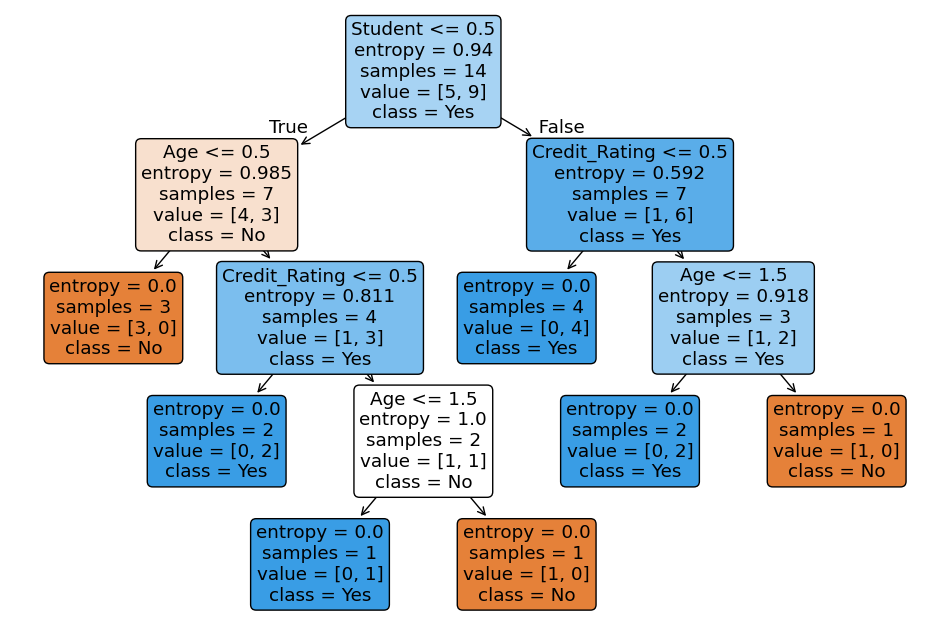

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'Age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'Income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'Student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'Credit_Rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'Buys_Computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Custom encoding function
def encode_column(column, mapping=None):
    if mapping is None:
        unique_values = column.unique()
        mapping = {value: i for i, value in enumerate(unique_values)}
    return column.map(mapping), mapping

# Encode categorical variables
encoded_data = {}
mappings = {}

for column in df.columns:
    encoded_data[column], mappings[column] = encode_column(df[column])

encoded_df = pd.DataFrame(encoded_data)

# Separate features and target
X = encoded_df.drop('Buys_Computer', axis=1)
y = encoded_df['Buys_Computer']

# Create and train the decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

# Prepare the new example
new_example_data = {
    'Age': '<=30',
    'Income': 'medium',
    'Student': 'yes',
    'Credit_Rating': 'fair'
}

# Encode the new example
new_example_encoded = {}
for feature, value in new_example_data.items():
    if value in mappings[feature]:
        new_example_encoded[feature] = mappings[feature][value]
    else:
        # If a new value is encountered, assign it a new number
        new_value = max(mappings[feature].values()) + 1
        mappings[feature][value] = new_value
        new_example_encoded[feature] = new_value

new_example = pd.DataFrame([new_example_encoded])

# Predict for the new example
prediction = clf.predict(new_example)
print(f"Prediction for the new example: {'Buys computer' if prediction[0] == 1 else 'Does not buy computer'}")

# Visualize the decision tree using plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()


e5

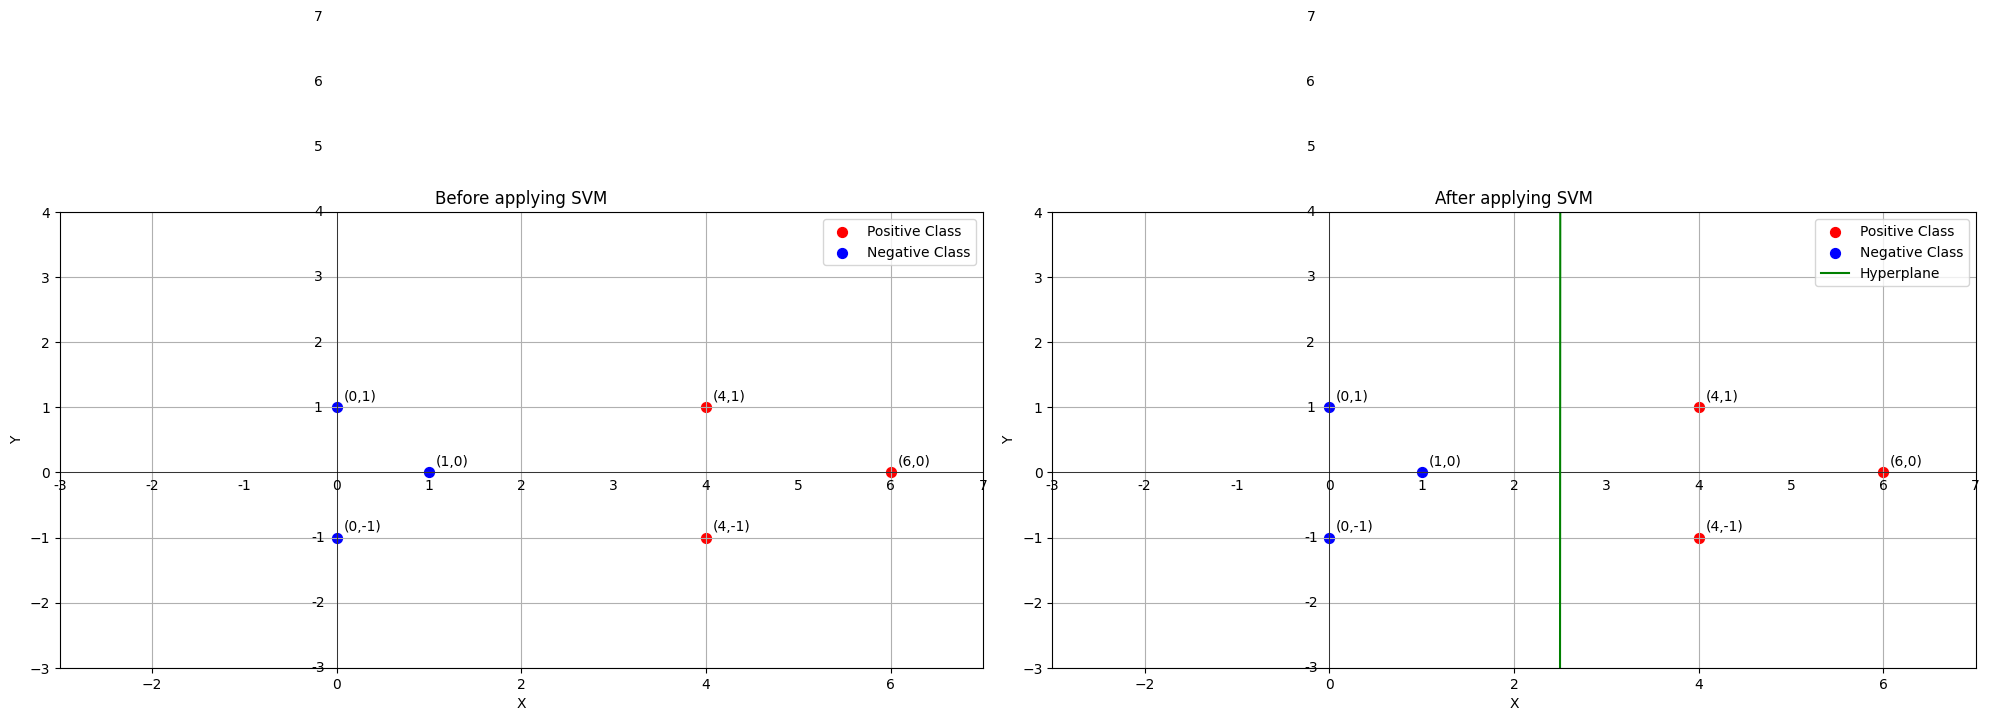

Hyperplane equation: 0.67x + -0.00y + -1.67 = 0
Support vectors:
[[ 1.  0.]
 [ 4.  1.]
 [ 4. -1.]]


In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# Data preparation
X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])  # 1 for positive class, -1 for negative class

# Create the SVM model
clf = svm.SVC(kernel='linear', C=1000)

def plot_graph(ax, X, y, title, draw_hyperplane=False):
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

    # Plot the data points
    ax.scatter(X[y==1, 0], X[y==1, 1], c='red', s=50, label='Positive Class')
    ax.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', s=50, label='Negative Class')

    # Add labels to the points
    for i, (x, y_coord) in enumerate(X):
        ax.annotate(f'({x},{y_coord})', (x, y_coord), xytext=(5, 5), textcoords='offset points')

    if draw_hyperplane:
        # Get the hyperplane
        w = clf.coef_[0]
        b = clf.intercept_[0]
        x_points = np.array([-1, 7])
        y_points = -(w[0] * x_points + b) / w[1]

        # Plot the hyperplane
        ax.plot(x_points, y_points, 'g-', label='Hyperplane')

    ax.set_xlim(-3, 7)
    ax.set_ylim(-3, 4)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    # Add axis labels
    for i in range(-3, 8):
        ax.text(i, -0.2, str(i), ha='center', va='center')
        if i != 0:
            ax.text(-0.2, i, str(i), ha='center', va='center')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot before applying SVM
plot_graph(ax1, X, y, "Before applying SVM")

# Fit the SVM model
clf.fit(X, y)

# Plot after applying SVM
plot_graph(ax2, X, y, "After applying SVM", draw_hyperplane=True)

plt.tight_layout()
plt.show()

# Print the equation of the hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
print(f"Hyperplane equation: {w[0]:.2f}x + {w[1]:.2f}y + {b:.2f} = 0")

# Print support vectors
print("Support vectors:")
print(clf.support_vectors_)

e6

7th month sales: y = 0.54 + (0.66 * 7) = 5.16
9th month sales: y = 0.54 + (0.66 * 9) = 6.48


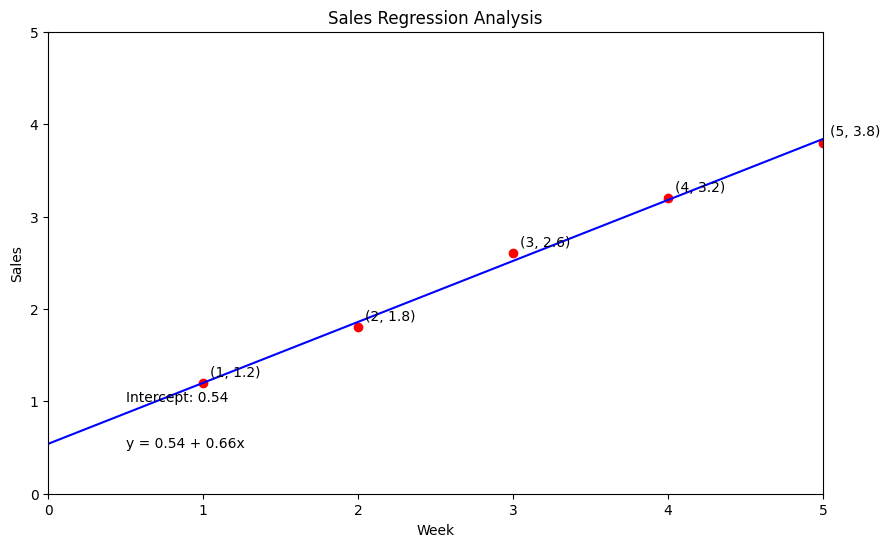


Regression Equation: y = 0.54 + 0.66x
Intercept: 0.54
Slope: 0.66


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
weeks = [1, 2, 3, 4,5]
sales = [1.2, 1.8, 2.6, 3.2,3.8]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weeks, sales, color='red', marker='o')

# Fit the linear regression model
X = np.array(weeks).reshape(-1, 1)
y = np.array(sales)
reg = LinearRegression().fit(X, y)

# Get intercept and slope
intercept = reg.intercept_
slope = reg.coef_[0]

# Generate points for the regression line
line_x = np.array([0, 5])
line_y = intercept + slope * line_x

# Plot the regression line
plt.plot(line_x, line_y, color='blue')

# Customize the plot
plt.title('Sales Regression Analysis')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xlim(0, 5)
plt.ylim(0, 5)

# Add text for intercept and regression equation
plt.text(0.1, 0.2, f'Intercept: {intercept:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.1, f'y = {intercept:.2f} + {slope:.2f}x', transform=plt.gca().transAxes)

# Add point labels
for i, (x, y) in enumerate(zip(weeks, sales)):
    plt.annotate(f'({x}, {y:.1f})', (x, y), xytext=(5, 5), textcoords='offset points')

# Calculate and print predictions for 7th and 9th month
month_7 = intercept + slope * 7
month_9 = intercept + slope * 9
print(f"7th month sales: y = {intercept:.2f} + ({slope:.2f} * 7) = {month_7:.2f}")
print(f"9th month sales: y = {intercept:.2f} + ({slope:.2f} * 9) = {month_9:.2f}")

# Show the plot
plt.show()

# Print regression details
print(f"\nRegression Equation: y = {intercept:.2f} + {slope:.2f}x")
print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")

Coefficients:
a0 (Intercept): -1.699
a1 (Product 1): 3.484
a2 (Product 2): -0.055

Multiple Linear Regression Equation:
y = -1.699 + 3.484x1 + -0.055x2

Predicted 5th week sales: 15.391 lakhs


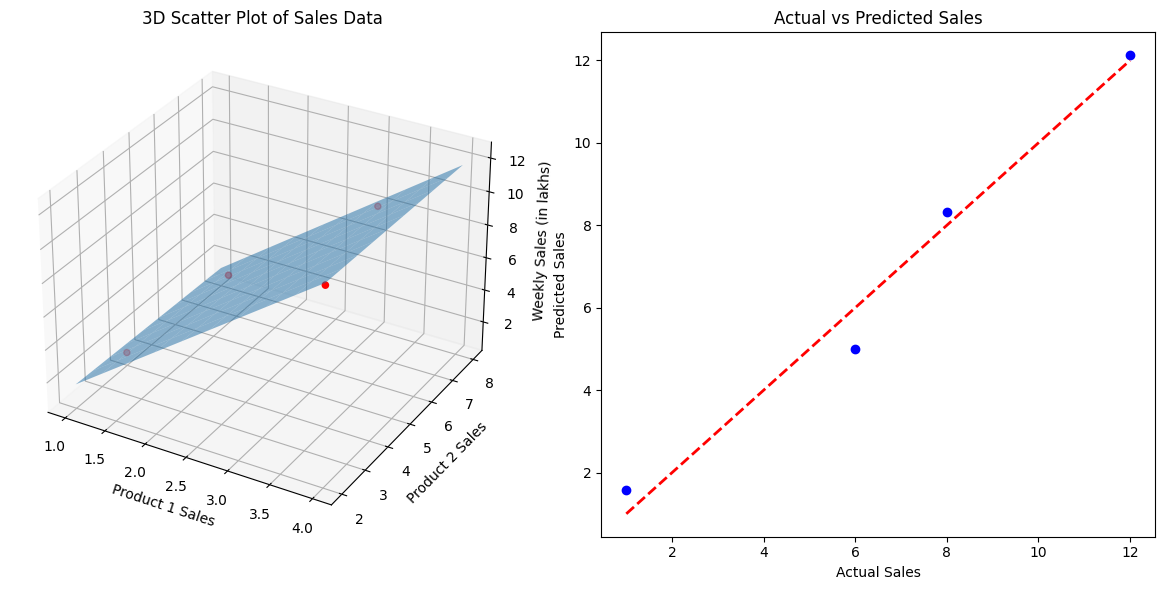

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data from the image
X = np.array([
    [1, 4],
    [2, 5],
    [3, 8],
    [4, 2]
])
y = np.array([1, 6, 8, 12])

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print("Coefficients:")
print(f"a0 (Intercept): {model.intercept_:.3f}")
print(f"a1 (Product 1): {model.coef_[0]:.3f}")
print(f"a2 (Product 2): {model.coef_[1]:.3f}")

# Construct the equation
equation = f"y = {model.intercept_:.3f} + {model.coef_[0]:.3f}x1 + {model.coef_[1]:.3f}x2"
print(f"\nMultiple Linear Regression Equation:\n{equation}")

# Predict 5th week sales
week_5_data = np.array([[5, 6]])  # 5th week data for Product 1 and Product 2
predicted_sales = model.predict(week_5_data)
print(f"\nPredicted 5th week sales: {predicted_sales[0]:.3f} lakhs")

# Visualize the data and predictions
fig = plt.figure(figsize=(12, 6))

# 3D scatter plot
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.set_xlabel('Product 1 Sales')
ax.set_ylabel('Product 2 Sales')
ax.set_zlabel('Weekly Sales (in lakhs)')
ax.set_title('3D Scatter Plot of Sales Data')

# Create a meshgrid for the prediction surface
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot the prediction surface
ax.plot_surface(X1, X2, Z, alpha=0.5)

# 2D plot for actual vs predicted values
ax2 = fig.add_subplot(122)
y_pred = model.predict(X)
ax2.scatter(y, y_pred, c='b', marker='o')
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Sales')
ax2.set_ylabel('Predicted Sales')
ax2.set_title('Actual vs Predicted Sales')

plt.tight_layout()
plt.show()

The equation for Logistic regression is:
y = 1 / (1 + e^(-x))

The probability for x is:
p(x) = z = a0 + a1*x

Given a0 = 1, a1 = 8, x = 60 marks, threshold > 0.5

p(x) = z = 1 + 8 * 60 = 481

The logistic regression equation is:
y = 1 / (1 + e^(-481.00)) = 1.0000000000

Since 1.0000000000 > 0.5, the student with marks = 60, is selected


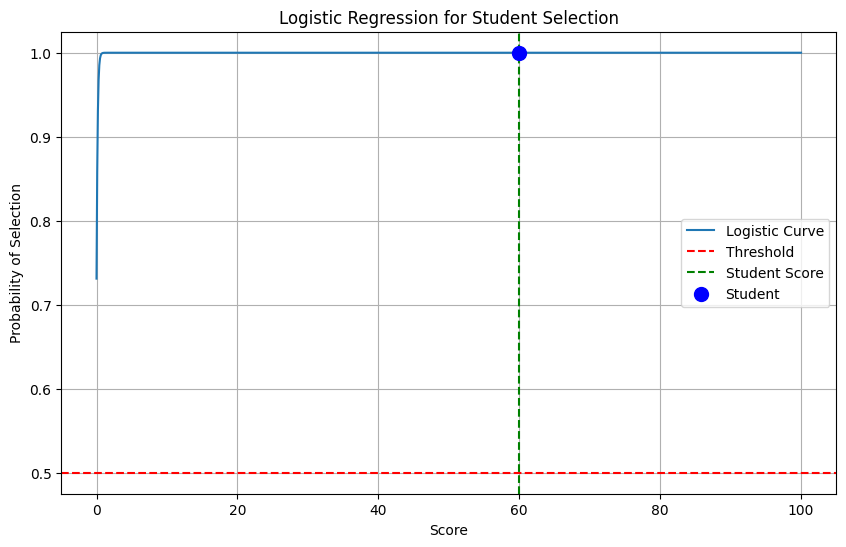

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, a0, a1):
    z = a0 + a1 * x
    return 1 / (1 + np.exp(-z))

# Parameters
a0 = 1
a1 = 8
threshold = 0.5

# Student's score
x = 60

# Calculate probability
p = a0 + a1 * x

# Calculate logistic regression result
y = logistic_function(x, a0, a1)

# Determine if student is selected
selected = y > threshold

# Print results
print(f"The equation for Logistic regression is:")
print(f"y = 1 / (1 + e^(-x))")
print(f"\nThe probability for x is:")
print(f"p(x) = z = a0 + a1*x")
print(f"\nGiven a0 = {a0}, a1 = {a1}, x = {x} marks, threshold > {threshold}")
print(f"\np(x) = z = {a0} + {a1} * {x} = {p}")
print(f"\nThe logistic regression equation is:")
print(f"y = 1 / (1 + e^(-{p:.2f})) = {y:.10f}")
print(f"\nSince {y:.10f} > {threshold}, the student with marks = {x}, is {'selected' if selected else 'not selected'}")

# Plotting
x_range = np.linspace(0, 100, 1000)
y_range = logistic_function(x_range, a0, a1)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='Logistic Curve')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axvline(x=x, color='g', linestyle='--', label='Student Score')
plt.scatter(x, y, color='b', s=100, zorder=5, label='Student')
plt.xlabel('Score')
plt.ylabel('Probability of Selection')
plt.title('Logistic Regression for Student Selection')
plt.legend()
plt.grid(True)
plt.show()

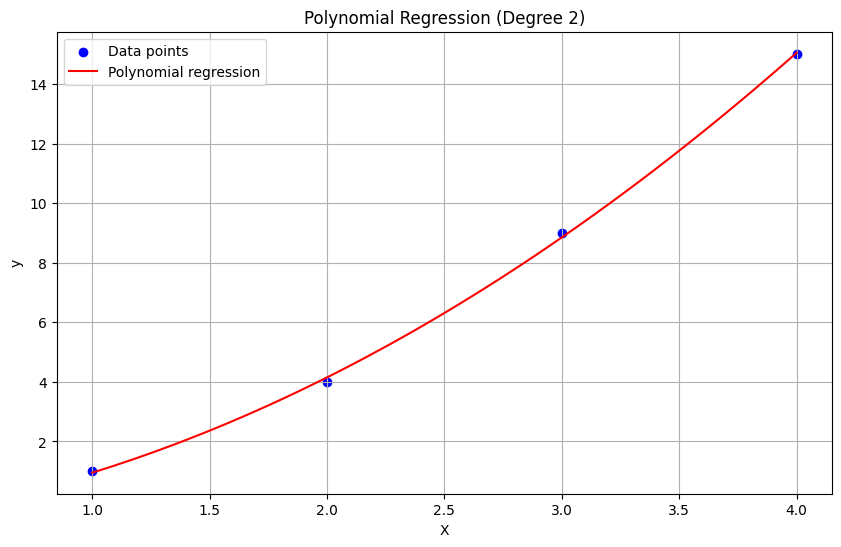

Coefficients: [0.95 0.75]
Intercept: -0.7500000000000036

Polynomial Regression Equation:
y = -0.75 + 0.95x + 0.75x^2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the dataset
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([1, 4, 9, 15])

# Perform polynomial regression
def polynomial_regression(X, y, degree=2):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    return model, poly_features

# Create a function to plot the results
def plot_polynomial_regression(X, y, model, poly_features):
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)

    y_plot = model.predict(X_plot_poly)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X_plot, y_plot, color='red', label='Polynomial regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {poly_features.degree})')

    # Create equation string
    coef = model.coef_.flatten()  # Flatten the coefficient array
    eq = f'y = {model.intercept_:.2f}'
    for i, c in enumerate(coef):
        if i == 0:
            eq += f' + {c:.2f}x'
        else:
            eq += f' + {c:.2f}x^{i+1}'




    plt.legend()
    plt.grid(True)
    plt.show()

# Perform regression and plot
model, poly_features = polynomial_regression(X, y)
plot_polynomial_regression(X, y, model, poly_features)

# Print the coefficients and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Print the equation
coef = model.coef_.flatten()  # Flatten the coefficient array
eq = f'y = {model.intercept_:.2f}'
for i, c in enumerate(coef):
    if i == 0:
        eq += f' + {c:.2f}x'
    else:
        eq += f' + {c:.2f}x^{i+1}'
print("\nPolynomial Regression Equation:")
print(eq)

e6 2nd part


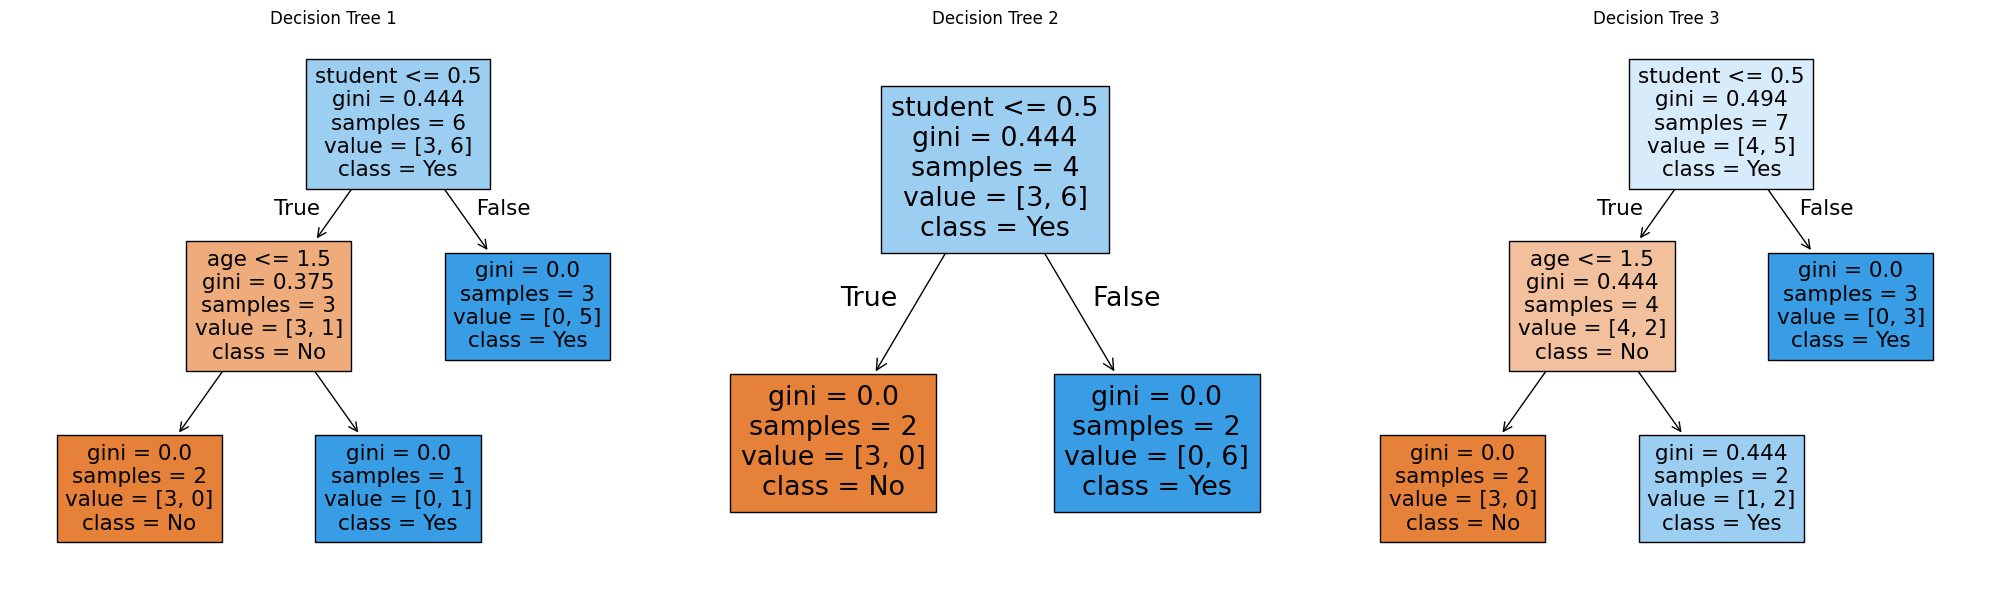

Prediction: Buys Computer


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Data
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent', 'fair'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create DataFrame
table = pd.DataFrame(data, columns=["age", "income", "student", "credit_rating", "buys_computer"])

# Label Encoding
encoder = LabelEncoder()
for column in table:
    table[column] = encoder.fit_transform(table[column])

# Features and labels
X = table.iloc[:, 0:4].values  # Features (first 4 columns)
y = table.iloc[:, 4].values    # Target (last column)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# RandomForestClassifier
model = RandomForestClassifier(n_estimators=3, random_state=2)
model.fit(X_train, y_train)

# Visualize decision trees
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
for idx, tree in enumerate(model.estimators_):
    plot_tree(tree, feature_names=table.columns[:4], class_names=['No', 'Yes'], filled=True, ax=axes[idx])
    axes[idx].set_title(f'Decision Tree {idx+1}')
plt.tight_layout()
plt.show()

# Encoded test data: age<=30, income=medium, student=yes, credit-rating=fair
test_data = [[0, 2, 1, 0]]

# Predict whether the person buys a computer or not
prediction = model.predict(test_data)

if prediction == 1:
    print("Prediction: Buys Computer")
else:
    print("Prediction: Doesn't Buy Computer")